In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data
accounts_df = pd.read_csv("Plant Shop Data/Accounts.csv")
plant_hierarchy_df = pd.read_csv("Plant Shop Data/Plant Hierarchy.csv")
plant_dts_df = pd.read_csv("Plant Shop Data/Plant_DTS.csv")

In [92]:
#Sales Analysis

In [3]:
#Find total sales per country
#Merge data (sales + account/country info) to find total sales by country
sales_w_country = pd.merge(plant_dts_df, accounts_df, on="Account_id", how="left")

sales_by_country = sales_w_country.groupby("country2")["Sales_USD"].sum().sort_values(ascending=False)
sales_by_country.head()

country2
China          9986710.09
Brazil         2259971.12
Philippines    2065942.25
Portugal       1647733.63
Poland         1528919.55
Name: Sales_USD, dtype: float64

In [4]:
#Find monthly sales trends
#Convert to datetime
sales_w_country["Date_Time"] = pd.to_datetime(sales_w_country["Date_Time"])

#Create month column
sales_w_country["Month"] = sales_w_country["Date_Time"].dt.to_period("M")

#Select monthly total sales
monthly_sales = sales_w_country.groupby("Month")["Sales_USD"].sum()
monthly_sales

Month
2022-01    1193470.25
2022-02    1153794.37
2022-03    1085351.48
2022-04    1141384.83
2022-05    1102559.40
2022-06     940685.86
2022-07    1134567.04
2022-08    1104515.56
2022-09    1013919.98
2022-10    1128549.95
2022-11    1383639.02
2022-12    1127176.08
2023-01    1070557.17
2023-02     807188.09
2023-03    1194088.05
2023-04    1342504.86
2023-05    1166507.98
2023-06    1171409.67
2023-07     980330.03
2023-08    1085075.70
2023-09     942373.65
2023-10     898432.22
2023-11    1191950.57
2023-12    1146932.03
2024-01     993603.77
2024-02    1147435.24
2024-03    1039868.15
2024-04     388417.56
Freq: M, Name: Sales_USD, dtype: float64

In [95]:
#Find best-selling plants and plant families
#Merge data (sales + product info)
sales_w_products = pd.merge(plant_dts_df, plant_hierarchy_df, left_on="Product_id", right_on="Product_Name_id", how="left")

#Best-selling plants
top_plants = sales_w_products.groupby("Product_Name")["Sales_USD"].sum().sort_values(ascending=False)
top_plants.head()

#Best-selling plant families
top_families = sales_w_products.groupby("Product_Family")["Sales_USD"].sum().sort_values(ascending=False)
top_families.head()

Product_Family
Asteraceae          3238198.45
Fabaceae            2365522.81
Poaceae             1711733.88
Rosaceae            1035645.79
Scrophulariaceae    1009802.59
Name: Sales_USD, dtype: float64

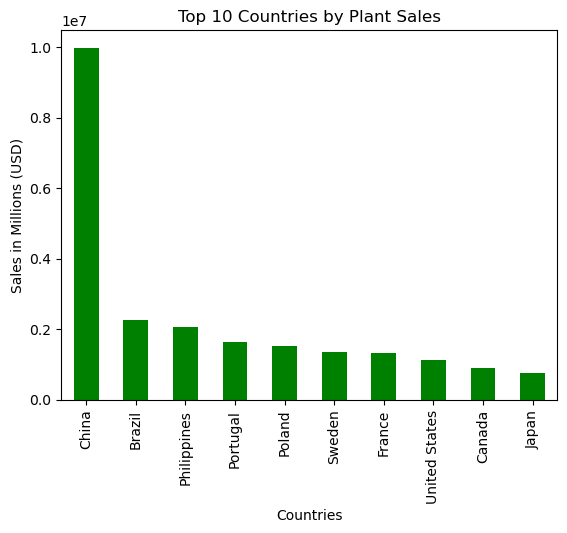

In [96]:
#Graph Top 10 Countries
sales_by_country.head(10).plot(kind="bar", color="green",title="Top 10 Countries by Plant Sales", ylabel="Sales in Millions (USD)", xlabel="Countries")
plt.show()

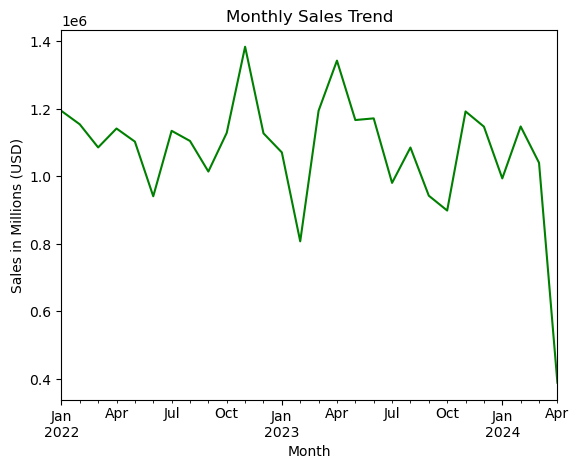

In [31]:
#Graph Monthly Sales
monthly_sales.plot(kind="line", color="green", title="Monthly Sales Trend", ylabel="Sales in Millions (USD)")
plt.show()

In [ ]:
#Profitability

In [97]:
#Gross Profit
#Merge data (country + product info)
sales_full = pd.merge(sales_w_country, plant_hierarchy_df, left_on="Product_id", right_on="Product_Name_id", how="left")

sales_full["Gross_Profit"] = sales_full["Sales_USD"] - sales_full["COGS_USD"]

#GP by Product
gp_by_product = sales_full.groupby("Product_Name")["Gross_Profit"].sum().sort_values(ascending=False)
gp_by_product.head()

Product_Name
Verbena urticifolia L. var. leiocarpa L.M. Perry & Fernald               43880.34239
Sanicula crassicaulis Poepp. ex DC. var. tripartita (Suksd.) H. Wolff    41151.05107
Veronica prostrata L.                                                    40171.86936
Callirhoe digitata Nutt.                                                 39205.47888
Huperzia taxifolia (Sw.) Trevis.                                         37690.87409
Name: Gross_Profit, dtype: float64

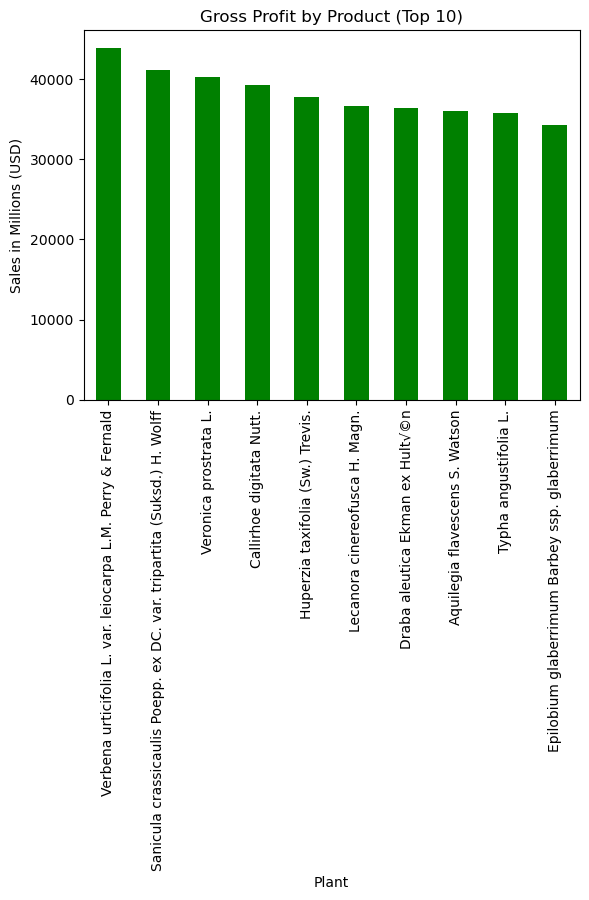

In [62]:
# Graph GP by Product
gp_by_product.head(10).plot(kind="bar", color="green", title="Gross Profit by Product (Top 10)", ylabel="Sales in Millions (USD)", xlabel="Plant")
plt.show()

In [36]:
#GP by Country
gp_by_country = sales_full.groupby("country2")["Gross_Profit"].sum().sort_values(ascending=False)
gp_by_country.head()

country2
China          3.906001e+06
Brazil         9.276748e+05
Philippines    8.330374e+05
Portugal       6.669713e+05
Poland         5.784607e+05
Name: Gross_Profit, dtype: float64

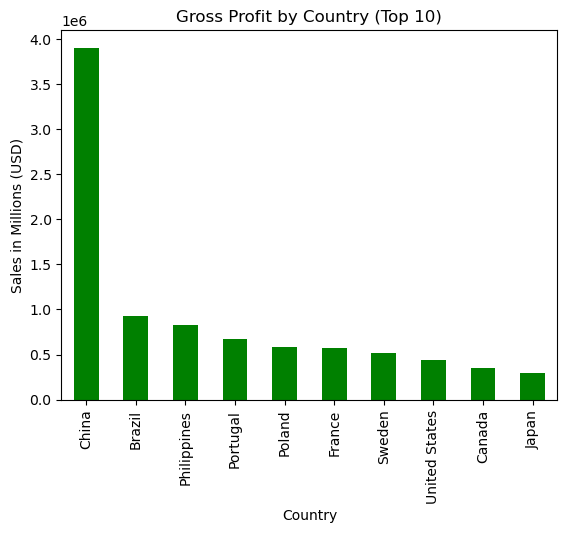

In [63]:
# Graph GP by Country
gp_by_country.head(10).plot(kind="bar", color="green", title="Gross Profit by Country (Top 10)", ylabel="Sales in Millions (USD)", xlabel="Country")
plt.show()

In [98]:
#Profit Margin
sales_full["Profit_Margin_%"] = (sales_full["Gross_Profit"] / sales_full["Sales_USD"]) * 100

In [99]:
#Avg Profit Margin (Overall, %)
avg_profit_margin = sales_full["Profit_Margin_%"].mean()
avg_profit_margin

39.850532786885246

In [100]:
#Avg Profit Margin (Product, %)
avg_pm_by_prod = sales_full.groupby("Product_Name")["Profit_Margin_%"].mean().sort_values(ascending=False)
avg_pm_by_prod

Product_Name
Navarretia intertexta (Benth.) Hook. ssp. intertexta                                      70.0
Leucanthemum vulgare Lam.                                                                 69.8
Glandularia chiricahensis Umber                                                           68.6
Plagiobothrys fulvus (Hook. & Arn.) I.M. Johnst. var. campestris (Greene) I.M. Johnst.    68.4
Polygala penaea L.                                                                        68.4
                                                                                          ... 
Flyriella parryi (A. Gray) R.M. King & H. Rob.                                            10.9
Leptochloa panicoides (J. Presl) Hitchc.                                                  10.8
Tripsacum floridanum Porter ex Vasey                                                      10.8
Alyssum simplex Rudolphi                                                                  10.4
Punctelia perreticulata (Rasanen) G. 

In [87]:
#Avg Profit Margin (Country, %)
avg_pm_by_country = sales_full.groupby("country2")["Profit_Margin_%"].mean().sort_values(ascending=False)
avg_pm_by_country.head()

country2
Cambodia       68.60
New Zealand    66.90
Ghana          60.50
Belgium        56.45
Ethiopia       50.30
Name: Profit_Margin_%, dtype: float64

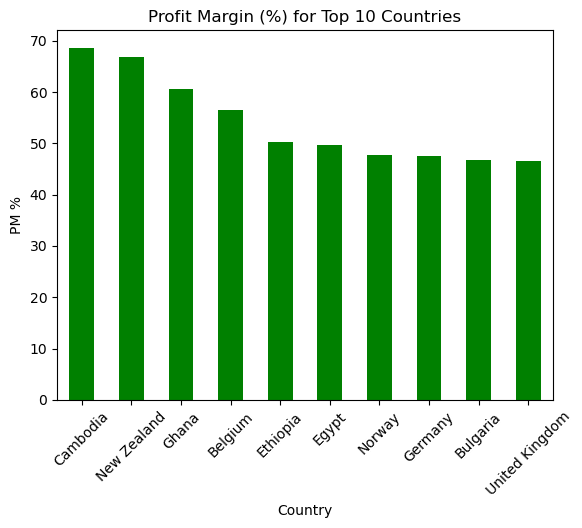

In [72]:
# Graph PM by Country
avg_pm_by_country.head(10).plot(kind="bar", color="green", title="Profit Margin (%) for Top 10 Countries", ylabel="PM %", xlabel="Country")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Product Performance

In [101]:
# Performance by Plant Family
sales_by_fam = sales_w_products.groupby("Product_Family")["Sales_USD"].sum().sort_values(ascending=False)
sales_by_fam

Product_Family
Asteraceae          3238198.45
Fabaceae            2365522.81
Poaceae             1711733.88
Rosaceae            1035645.79
Scrophulariaceae    1009802.59
                       ...    
Thelotremataceae       9542.53
Thymelaeaceae          7679.92
Pertusariaceae         7220.23
Heliconiaceae          6419.53
Menyanthaceae          5143.18
Name: Sales_USD, Length: 185, dtype: float64

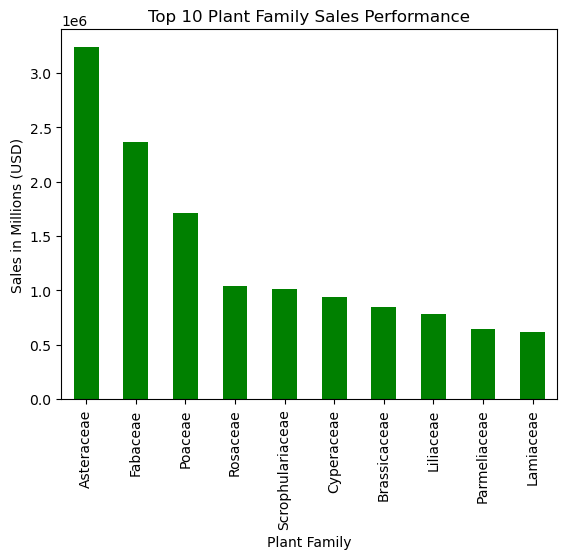

In [75]:
# Graph Performance by Plant Family
sales_by_fam.head(10).plot(kind="bar", color="green", title="Top 10 Plant Family Sales Performance", ylabel="Sales in Millions (USD)", xlabel="Plant Family")
plt.show()

In [102]:
#Performance by Plant Type
sales_by_type = sales_w_products.groupby("Product_Name")["Sales_USD"].sum().sort_values(ascending=False)
sales_by_type

Product_Name
Veronica prostrata L.                                         103373.05
Pleurothallis domingensis Cogn.                                93576.82
Typha angustifolia L.                                          92107.39
Verbena urticifolia L. var. leiocarpa L.M. Perry & Fernald     89288.14
Epilobium glaberrimum Barbey ssp. glaberrimum                  88998.85
                                                                ...    
Triplasis purpurea (Walter) Chapm.                              5160.08
Dietes grandiflora N.E. Br.                                     5158.24
Viola tomentosa M.S. Baker & J.C. Clausen                       5143.18
Pityrogramma √ómackenneyi W.H. Wagner                           5134.50
Sclerocactus parviflorus Clover & Jotter                        5038.40
Name: Sales_USD, Length: 915, dtype: float64

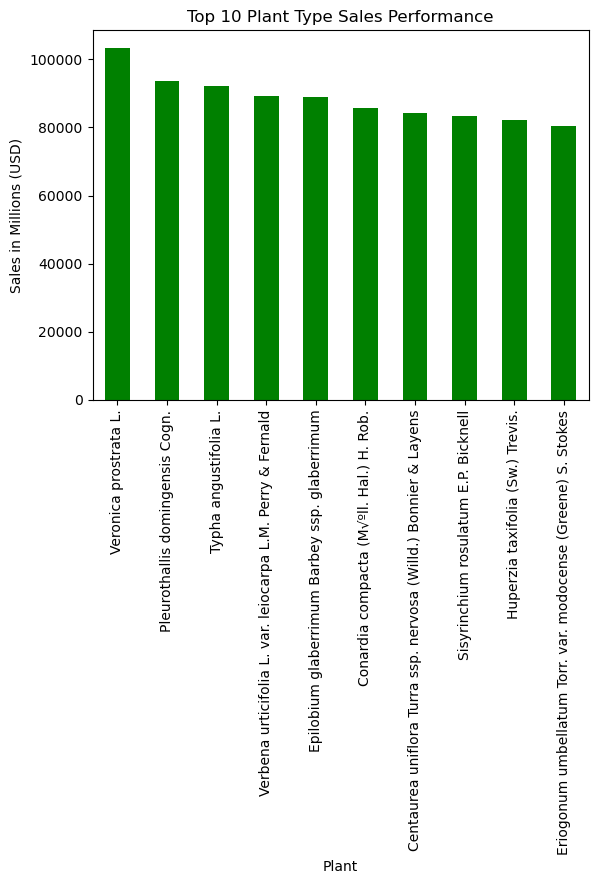

In [103]:
# Graph Performance by Plant 
sales_by_type.head(10).plot(kind="bar", color="green", title="Top 10 Plant Type Sales Performance", ylabel="Sales in Millions (USD)", xlabel="Plant")
plt.show()

In [46]:
#Avg quantity sold per transaction 
avg_qty = sales_w_products["quantity"].mean()
avg_qty

509.32129098360656

In [48]:
#Avg quantity (plant family) sold per transaction
avg_qty_by_fam = sales_w_products.groupby("Product_Family")["quantity"].mean().sort_values(ascending=False)
avg_qty_by_fam

Product_Family
Heliconiaceae     969.000000
Pertusariaceae    923.640000
Hymeneliaceae     887.930000
Acarosporaceae    877.993333
Simmondsiaceae    828.255000
                     ...    
Gyalectaceae      239.310000
Candelariaceae    233.380000
Dioscoreaceae     139.090000
Micareaceae       122.030000
Gomphillaceae      74.120000
Name: quantity, Length: 185, dtype: float64

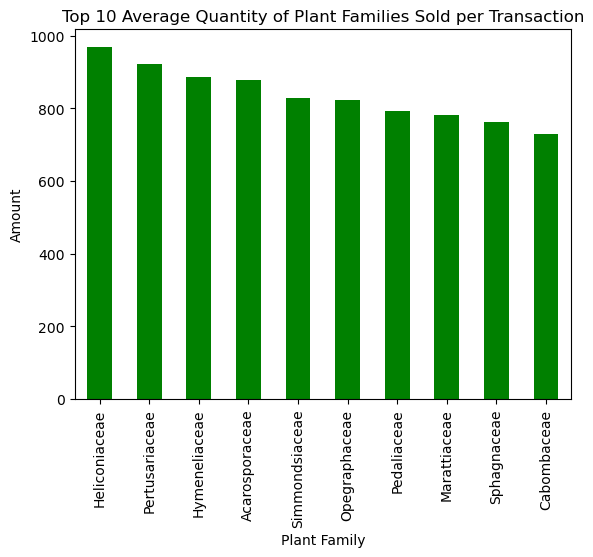

In [84]:
# Graph Avg Qty (Plant Family) Sold per Transaction
avg_qty_by_fam.head(10).plot(kind="bar", color="green", title="Top 10 Average Quantity of Plant Families Sold per Transaction", ylabel="Amount", xlabel="Plant Family")
plt.show()

In [49]:
#Avg quantity (plant type) sold per transaction
avg_qty_by_type = sales_w_products.groupby("Product_Name")["quantity"].mean().sort_values(ascending=False)
avg_qty_by_type

Product_Name
Quercus gravesii Sudw.                                                              993.56
Hypogymnia duplicata (Ach.) Rass.                                                   992.49
Acer pseudoplatanus L.                                                              991.74
Anulocaulis leiosolenus (Torr.) Standl. var. howardii Spellenb. & Wootten Africa    982.49
Hieracium glomeratum Froel. Xx                                                      977.47
                                                                                     ...  
Platonia esculenta (Arruda) Rickett & Stafleu                                        24.66
Sonchus arvensis L.                                                                  24.25
Orthodontium pellucens (Hook.) Bruch & Schimp.                                       14.08
Maianthemum stellatum (L.) Link                                                      13.77
Lotus denticulatus (E. Drew) Greene                                          